# Problem 2: Thermal Conductivity Model using General Linear Least Squares

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/WCC-Engineering/pa5-curve-fitting-Alvarez12430/blob/main/problem2_thermal_conductivity_modeling.ipynb)

## Background

The thermal conductivity of composite materials is an important property in many engineering applications, from building insulation to electronic cooling systems. For certain composite materials, the thermal conductivity depends on multiple factors including temperature and the volume fractions of different constituent materials.

Research has shown that the thermal conductivity of certain metal-ceramic composites follows a model of the form:

$$k(T, V_m) = a_0 + a_1 T + a_2 V_m + a_3 \ln(T \cdot V_m)$$

Where:
- $k$ is the thermal conductivity (W/m·K)
- $T$ is the temperature (K)
- $V_m$ is the volume fraction of metal in the composite (0-1)
- $a_0, a_1, a_2, a_3$ are model parameters to be determined

## Problem Description

You are a materials engineer studying the thermal properties of a novel aluminum-ceramic composite. You have collected experimental data on the thermal conductivity of the material at different temperatures and metal volume fractions.

Your task is to determine the parameters of the thermal conductivity model using general linear least squares regression. This will allow you to predict the thermal conductivity for any combination of temperature and metal volume fraction within the range of your data.

## Learning Objectives
- Formulate basis functions for a multivariate linear least squares problem
- Apply the general linear least squares algorithm using numpy.linalg
- Evaluate the model fit using appropriate statistical metrics
- Create 3D visualizations of experimental data and model predictions

In [6]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')

## Step 1: Load the experimental data

Below is the experimental data from thermal conductivity measurements of the aluminum-ceramic composite at various temperatures and metal volume fractions.

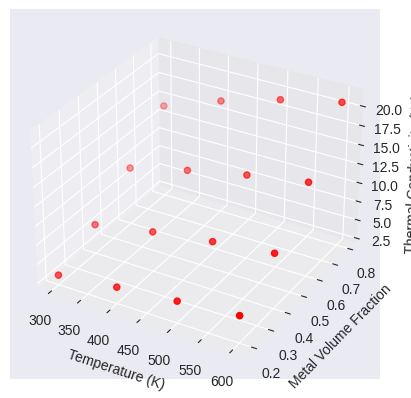

In [7]:
# Experimental data: Temperature (K), Metal Volume Fraction, and Thermal Conductivity (W/m·K)
temp_K = np.array([300, 300, 300, 300, 400, 400, 400, 400, 500, 500, 500, 500, 600, 600, 600, 600])
metal_vol_frac = np.array([0.2, 0.4, 0.6, 0.8, 0.2, 0.4, 0.6, 0.8, 0.2, 0.4, 0.6, 0.8, 0.2, 0.4, 0.6, 0.8])
thermal_cond = np.array([3.2, 5.8, 9.5, 14.2, 4.1, 7.2, 11.4, 16.9, 4.8, 8.3, 13.0, 19.1, 5.5, 9.2, 14.3, 20.8])

# Visualize the experimental data in 3D
# TODO: Write code to create a 3D scatter plot of the data
# with temperature on x-axis, metal volume fraction on y-axis, and thermal conductivity on z-axis
#had AI help me plot in 3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the 3D scatter plot
ax.scatter(temp_K, metal_vol_frac, thermal_cond, c='r', marker='o')

# Set labels for the axes
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Metal Volume Fraction')
ax.set_zlabel('Thermal Conductivity (W/m·K)')

# Display the plot
plt.show()


## Step 2: Set up the linear system

The thermal conductivity model can be rewritten in the form of a general linear model:

$$k(T, V_m) = a_0 \phi_0(T, V_m) + a_1 \phi_1(T, V_m) + a_2 \phi_2(T, V_m) + a_3 \phi_3(T, V_m)$$

Where the basis functions are:
- $\phi_0(T, V_m) = 1$ (constant term)
- $\phi_1(T, V_m) = T$ (temperature term)
- $\phi_2(T, V_m) = V_m$ (volume fraction term)
- $\phi_3(T, V_m) = \ln(T \cdot V_m)$ (interaction term)

In matrix form, this becomes:
$$\mathbf{k} = \mathbf{A} \mathbf{a}$$

Where:
- $\mathbf{k}$ is the vector of thermal conductivity measurements
- $\mathbf{A}$ is the design matrix, where each row corresponds to a measurement and each column to a basis function
- $\mathbf{a}$ is the vector of coefficients to be determined

In [10]:
# TODO: Create the design matrix A
# Each row should correspond to a data point
# Each column should correspond to a basis function evaluation at that data point
temp_data_points = len(temp_K)
#AI came up with this suggest where we give we use K to give our
#number of rows and the 4 is just our number of columns
#and just following what we are given we know it has to be 1
A = np.ones((len(temp_K), 4))
# This line takes the values from the temp_K array to the second column of the matrix A
A[:, 1] = temp_K
#this takes the values to the third column of the design matrix
A[:, 2] = metal_vol_frac
#using the equation given above and assigning it to the forth column
A[:, 3] = np.log(temp_K * metal_vol_frac)


## Step 3: Solve for the coefficients using linear least squares

The least squares solution minimizes $||\mathbf{A}\mathbf{a} - \mathbf{k}||^2$ and can be found using:

$$\mathbf{a} = (\mathbf{A}^T\mathbf{A})^{-1}\mathbf{A}^T\mathbf{k}$$

NumPy provides a convenient function `numpy.linalg.lstsq()` for solving least squares problems.

In [13]:
# TODO: Solve the least squares problem to find the coefficients a0, a1, a2, and a3
# Use np.linalg.lstsq() and extract the coefficients]
a = np.linalg.lstsq(A, thermal_cond, rcond=None)[0]

## Step 4: Calculate the goodness-of-fit

Evaluate how well the model fits the experimental data by calculating:
1. The coefficient of determination (R²)
2. The root mean squared error (RMSE)

In [16]:
# TODO:
# 1. Calculate the predicted thermal conductivity values using the model
#got help with AI for this part with the equation to trouble shoot but also basing it off my old code
y_pred= np.dot(A, a)
# 2. Calculate R² and RMSE
r_squared = 1 - np.sum((thermal_cond - y_pred)**2) / np.sum((thermal_cond - np.mean(thermal_cond))**2)
rmse = np.sqrt(np.mean((thermal_cond - y_pred)**2))
# 3. Print the results
print("R²:", r_squared)
print("RMSE:", rmse)




R²: 0.9833361343017182
RMSE: 0.6833922849244174


## Step 5: Visualize the model fit

Create a 3D surface plot showing the model predictions over the range of temperatures and metal volume fractions, along with the experimental data points.

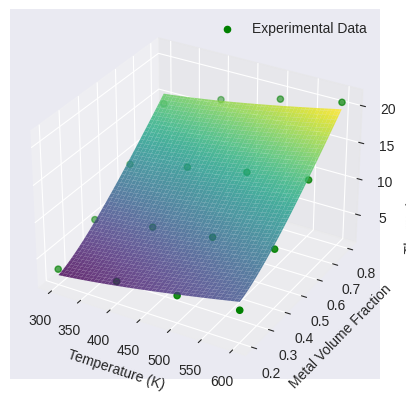

In [19]:
# TODO: Create a 3D surface plot of the model with the experimental data points
# 1. Generate a grid of temperature and metal volume fraction values
# 2. Calculate the thermal conductivity predictions for the grid
# 3. Plot the model as a surface and the experimental data as points
#had help with AI setting up the 3d graph
temp_grid = np.linspace(min(temp_K), max(temp_K), 100)
metal_grid = np.linspace(min(metal_vol_frac), max(metal_vol_frac), 100)
# Create meshgrid from the temperature and metal volume fraction grids
Temp_grid, Metal_grid = np.meshgrid(temp_grid, metal_grid)

#got help with AI making my k pred This line uses the determined coefficients
# a and the meshgrid to calculate the predicted thermal conductivity
# Calculate thermal conductivity predictions using the model
k_pred = a[0] + a[1] * Temp_grid + a[2] * Metal_grid + a[3] * np.log(Temp_grid * Metal_grid)

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
#using the pred to make the surface
surf = ax.plot_surface(Temp_grid, Metal_grid, k_pred, cmap=cm.viridis, alpha=0.8)

# Plot the experimental data points
ax.scatter(temp_K, metal_vol_frac, thermal_cond, c='green', marker='o', label='Experimental Data')

# Set labels for the axes
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Metal Volume Fraction')
ax.set_zlabel('Thermal Conductivity (W/m·K)')

# Add a legend
ax.legend()

# Display the plot
plt.show()


## Step 6: Analyze the model

Use the fitted model to answer the following questions:

1. What is the predicted thermal conductivity for a composite with 50% metal volume fraction at 450K?

i got 9.656446715784366 W/m·K

2. At what temperature would a composite with 70% metal volume fraction reach a thermal conductivity of 15 W/m·K?

the temperature it would need to be at would be 468.45 K

3. Explain the physical meaning of each coefficient in the model.

from reading the lab instruction we know a0 is just a constant and a1 is the tempature term and a2 is volume fraction term and finally a3 is the intraction term

In [24]:
# TODO: Answer question 1 - predicted thermal conductivity at T=450K, Vm=0.5
T= 450
Vm= 0.5
k_pred_1 = a[0] + a[1] * T + a[2] * Vm + a[3] * np.log(T * Vm)
print(f"Predicted thermal conductivity at T=",T ,"K", "Vm=",Vm, "k=" ,k_pred_1 ,"W/m·K")


# TODO: Answer question 2 - find temperature where T=?, Vm=0.7, k=15 W/m·K'
# used F solve from poplualtion code to slove for T
from scipy.optimize import fsolve

Vm = 0.7  # Metal volume fraction
k_target = 15  # Target thermal conductivity

#had AI trouble shoot the code
# Define a function for the equation to solve
def equation_to_solve(T):
    return a[0] + a[1] * T + a[2] * Vm + a[3] * np.log(T * Vm) - k_target

# Use fsolve to find the temperature
T_solution = fsolve(equation_to_solve, 400)[0]  # Initial guess of 400K

print(f"Temperature for k={k_target} W/m·K and Vm={Vm}: {T_solution:.2f} K")


Predicted thermal conductivity at T= 450 K Vm= 0.5 k= 9.656446715784366 W/m·K
Temperature for k=15 W/m·K and Vm=0.7: 468.45 K


**Interpretation of coefficients:**  
<!-- Your explanation goes here -->